In [1]:
import season_streaks
all_players = season_streaks.get_all_player_streaks()

In [ ]:
#!pip install tabulate


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\casey\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from qbstyles import mpl_style

mpl_style(dark=True)

In [4]:
shots = pd.read_feather("streak-augment.feather")

In [5]:
all_players[all_players.z_score > 3.5].sort_values("z_score", ascending=False)

,player_id,player_name,makes,misses,total_streaks,raw_data,expected_streaks,variance,sd,z_score,ww_percentile
416,2544,LeBron James,14837,14474,15159,LWLWLWLWWWLWLWLWLWWWWLLWWLLWLWWLLWLLWLLLWWLLLL...,14654.252226,7325.252390,85.587688,5.897434,100.000000
1504,1628398,Kyle Kuzma,3133,3809,3622,WWWLLWLLWWLWWWWLWLLWWWWLWLWLLWLLWLLWWLLLWWLLWL...,3439.086142,1702.492182,41.261267,4.433064,99.999535
1253,203944,Julius Randle,4441,5004,4920,LWLWLLWWWLLLWLLLLLLWWLWWLLLWLLWWWWLWLLLWLLWLWL...,4706.720275,2344.250062,48.417456,4.405017,99.999471
229,1882,Elton Brand,4408,4347,4583,WWWWWWWLLLLLLWLWWWWLLWLLLLLLWLLLWLLLWWWLLLWLLL...,4378.287493,2188.287469,46.779135,4.376150,99.999396
1810,1630162,Anthony Edwards,2479,3076,2896,WLLLWWLLWLLWWLLWWLWWLWWWWWLLLLLLLWWWLWLLLLLLLW...,2746.419982,1356.605232,36.832122,4.061129,99.997558
1636,1629029,Luka Doncic,3898,4398,4311,LLLLLLWWLLLWWLWLWWLWLLLLWWWWWLLLWLLWLLLWWLWWWL...,4133.932498,2058.709837,45.373008,3.902485,99.995240
1176,203507,Giannis Antetokounmpo,6731,5615,6330,LLLWWWWLWLWLLLWLWLLLLWWWLWLLLWLWLWWLWWWLWLLWWL...,6123.560343,3036.016411,55.100058,3.746632,99.991039
1063,203089,John Henson,1438,1222,1418,LLLWLWWLLWWWLLLWLWWLLWLWWWWWLWLLWLWLWLWWWLLWWW...,1322.230075,656.008906,25.612671,3.739162,99.990768
823,201609,Goran Dragic,4605,5423,5166,WWLLLLWLLLWLWLLLWWWLWLWLLLWLLWLLLLWWLLLLLWWLWL...,4981.637216,2473.498199,49.734276,3.706956,99.989512
1761,1629673,Jordan Poole,1886,2612,2312,WLLLLLLLLWLLLLLLLWLLLLLLLLWLLWWWLLWLLWLLWLLLWL...,2191.409960,1066.423256,32.656137,3.692722,99.988907


## Anthony Edwards ("Ant")

first, I am going to look at Anthony Edwards. He's got a huge z score for such a young player. Hopefully whatever he's doing is obvious.

In [6]:
ant = all_players[all_players.player_id == 1630162]

In [7]:
ant

,player_id,player_name,makes,misses,total_streaks,raw_data,expected_streaks,variance,sd,z_score,ww_percentile
1810,1630162,Anthony Edwards,2479,3076,2896,WLLLWWLLWLLWWLLWWLWWLWWWWWLLLLLLLWWWLWLLLLLLLW...,2746.419982,1356.605232,36.832122,4.061129,99.997558


In [8]:
ant_shots = shots[shots.PLAYER_ID == 1630162]

In [9]:
ant_shots.groupby(["BASIC_ZONE"])["SHOT_MADE"].value_counts() 

BASIC_ZONE             SHOT_MADE
Above the Break 3      False        1264
                       True          699
Backcourt              False          13
In The Paint (Non-RA)  False         494
                       True          301
Left Corner 3          False          97
                       True           54
Mid-Range              False         498
                       True          259
Restricted Area        True         1132
                       False         642
Right Corner 3         False          68
                       True           34
Name: count, dtype: int64

In [10]:
fg_pct_zones = (ant_shots.groupby(["BASIC_ZONE"])["SHOT_MADE"].value_counts() / 
                ant_shots.groupby(["BASIC_ZONE"])["BASIC_ZONE"].value_counts())

fg_pct_zones[:,True]

BASIC_ZONE
Above the Break 3        0.356088
In The Paint (Non-RA)    0.378616
Left Corner 3            0.357616
Mid-Range                0.342140
Restricted Area          0.638106
Right Corner 3           0.333333
Name: count, dtype: float64

In [11]:
freq_zones = ant_shots.groupby(["BASIC_ZONE"])["BASIC_ZONE"].value_counts() / len(ant_shots)

In [12]:
freq_zones

BASIC_ZONE
Above the Break 3        0.353375
Backcourt                0.002340
In The Paint (Non-RA)    0.143114
Left Corner 3            0.027183
Mid-Range                0.136274
Restricted Area          0.319352
Right Corner 3           0.018362
Name: count, dtype: float64

can't take the 0.0 and 1.0 values too seriously due to small sample

In [13]:
ant_shots.last_5.value_counts()

last_5
0.4    1497
0.6    1183
0.2     743
0.8     435
0.0     146
1.0      47
Name: count, dtype: int64

In [14]:
ant_last_5 = (ant_shots.groupby("last_5")["SHOT_MADE"].value_counts() / ant_shots.groupby("last_5")["last_5"].value_counts())[:,True]

In [15]:
ant_last_5

last_5
0.0    0.445205
0.2    0.514132
0.4    0.442218
0.6    0.431107
0.8    0.416092
1.0    0.404255
Name: count, dtype: float64

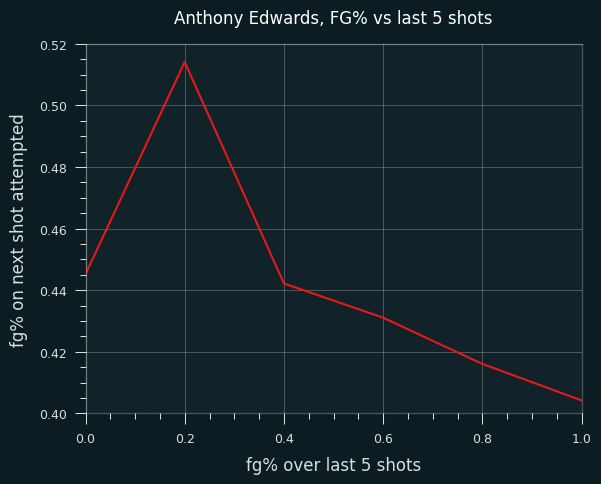

In [16]:
plt.plot(ant_last_5)
plt.xlabel("fg% over last 5 shots")
plt.ylabel("fg% on next shot attempted")
#plt.axhline(highvol_fg_pct, color="white")
plt.ylim(.40, .52)
plt.xlim(0,1)
#plt.axhline(lbj_overall, color="white")
_out = plt.title("Anthony Edwards, FG% vs last 5 shots")

In [17]:
## how does his shot selection change when hot vs. cold?

## I will split them right down the middle

ant_cleaned = ant_shots[ant_shots.BASIC_ZONE != "Backcourt"].copy()

# left vs right corner 3 isn't interesting.
ant_cleaned.loc[ant_cleaned.BASIC_ZONE == "Left Corner 3", "BASIC_ZONE"] = "Corner 3"
ant_cleaned.loc[ant_cleaned.BASIC_ZONE == "Right Corner 3", "BASIC_ZONE"] = "Corner 3"

hot_shots = ant_cleaned[ant_cleaned.last_5 >= .6]
cold_shots = ant_cleaned[ant_cleaned.last_5 <= .4]

In [18]:
hot_freq_zone = hot_shots.groupby(["BASIC_ZONE"])["BASIC_ZONE"].value_counts() / len(hot_shots)

In [19]:
hot_freq_zone

BASIC_ZONE
Above the Break 3        0.414708
Corner 3                 0.036166
In The Paint (Non-RA)    0.134418
Mid-Range                0.141049
Restricted Area          0.273659
Name: count, dtype: float64

In [20]:
cold_freq_zone = cold_shots.groupby(["BASIC_ZONE"])["BASIC_ZONE"].value_counts() / len(cold_shots)

In [21]:
cold_freq_zone

BASIC_ZONE
Above the Break 3        0.316674
Corner 3                 0.048299
In The Paint (Non-RA)    0.145737
Mid-Range                0.121798
Restricted Area          0.367493
Name: count, dtype: float64

In [131]:
diff_zone = hot_freq_zone - cold_freq_zone


In [ ]:
display_df = pd.DataFrame({'hot': hot_freq_zone, 
                           'cold': cold_freq_zone, 
                           'diff': diff_zone})

print((100 * display_df).round(1).to_markdown())

| BASIC_ZONE            |   hot |   cold |   diff |
|:----------------------|------:|-------:|-------:|
| Above the Break 3     |  41.5 |   31.7 |    9.8 |
| Corner 3              |   3.6 |    4.8 |   -1.2 |
| In The Paint (Non-RA) |  13.4 |   14.6 |   -1.1 |
| Mid-Range             |  14.1 |   12.2 |    1.9 |
| Restricted Area       |  27.4 |   36.7 |   -9.4 |





note this stuff below is for ant ONLY. 

In [23]:
hot_fg_pct = hot_shots.groupby(["BASIC_ZONE"])["SHOT_MADE"].value_counts() / hot_shots.groupby(["BASIC_ZONE"])["BASIC_ZONE"].value_counts()

In [24]:
cold_fg_pct = cold_shots.groupby(["BASIC_ZONE"])["SHOT_MADE"].value_counts() / cold_shots.groupby(["BASIC_ZONE"])["BASIC_ZONE"].value_counts()

In [25]:
(hot_fg_pct - cold_fg_pct)[:,True]

BASIC_ZONE
Above the Break 3       -0.031237
Corner 3                 0.119565
In The Paint (Non-RA)    0.068014
Mid-Range                0.014972
Restricted Area         -0.052393
Name: count, dtype: float64

In [26]:
hot_fg_pct[:,True]

BASIC_ZONE
Above the Break 3        0.340116
Corner 3                 0.450000
In The Paint (Non-RA)    0.408072
Mid-Range                0.363248
Restricted Area          0.601322
Name: count, dtype: float64

In [27]:
cold_fg_pct[:,True]

BASIC_ZONE
Above the Break 3        0.371353
Corner 3                 0.330435
In The Paint (Non-RA)    0.340058
Mid-Range                0.348276
Restricted Area          0.653714
Name: count, dtype: float64

In [144]:
display_df2 = pd.DataFrame({
    'hot': hot_fg_pct[:,True],
    'cold': cold_fg_pct[:,True],
    'diff': (hot_fg_pct - cold_fg_pct)[:,True]
})

display_df2

,hot,cold,diff
BASIC_ZONE,,,
Above the Break 3,0.340116,0.371353,-0.031237
Corner 3,0.450000,0.330435,0.119565
In The Paint (Non-RA),0.408072,0.340058,0.068014
Mid-Range,0.363248,0.348276,0.014972
Restricted Area,0.601322,0.653714,-0.052393


In [145]:
print((100 * display_df2).round(1).to_markdown())

| BASIC_ZONE            |   hot |   cold |   diff |
|:----------------------|------:|-------:|-------:|
| Above the Break 3     |  34   |   37.1 |   -3.1 |
| Corner 3              |  45   |   33   |   12   |
| In The Paint (Non-RA) |  40.8 |   34   |    6.8 |
| Mid-Range             |  36.3 |   34.8 |    1.5 |
| Restricted Area       |  60.1 |   65.4 |   -5.2 |


OK, so what I want to do is go thru every player and get:

FG % by BASIC_ZONE for hot, cold, and neutral situations

tendency % by BASIC_ZONE for hot, cold, neutral situations

count of each situation


just make a function that does FG%, tendency% and raw counts for a set of shots it's passed in. then you can go hot, cold, other as 3 separate data frames, then merge those?

problem is small sample sizes, and significance. don't want to be messy.

what question are you really trying to answer here? 

* do players in general take lower %age shots when they're on a "hot streak"? I thought we saw that was untrue, by looking at the global last5 percentages.

* which players *significantly* change their shot tendencies, as far as types of shots? ... groupby last_5, look at shot tendencies? that seems pretty easy.

* for players with big changes in fg% over last 5... how does that correlate to streakiness?


# Start of league-wide analysis

In [28]:
import hot_cold_analysis

In [29]:
cleaned = hot_cold_analysis.clean_shots(shots)

gb = cleaned.groupby(["last_5", "BASIC_ZONE"])

In [30]:
agg1 =  (gb["SHOT_MADE"].value_counts() / gb["BASIC_ZONE"].value_counts())

fg_pct_by_last_5 = agg1[:,:,True]

the big question is... do tendencies change?

In [31]:
#hot_shots.groupby(["BASIC_ZONE"])["BASIC_ZONE"].value_counts() / len(hot_shots)

gb["last_5"].value_counts()

cleaned.groupby("last_5")["BASIC_ZONE"].count()
# yikes, no


last_5
0.0     80609
0.2    377211
0.4    690032
0.6    614362
0.8    267751
1.0     46112
Name: BASIC_ZONE, dtype: int64

In [32]:
tendencies_last_5 = gb["BASIC_ZONE"].count() / cleaned.groupby("last_5")["BASIC_ZONE"].count()

In [33]:
type(tendencies_last_5)

pandas.core.series.Series

In [34]:
tendencies_last_5

last_5  BASIC_ZONE           
0.0     Above the Break 3        0.226786
        Corner 3                 0.075575
        In The Paint (Non-RA)    0.148557
        Mid-Range                0.222444
        Restricted Area          0.326638
0.2     Above the Break 3        0.224537
        Corner 3                 0.072829
        In The Paint (Non-RA)    0.151615
        Mid-Range                0.230139
        Restricted Area          0.320879
0.4     Above the Break 3        0.221697
        Corner 3                 0.068333
        In The Paint (Non-RA)    0.155106
        Mid-Range                0.238798
        Restricted Area          0.316067
0.6     Above the Break 3        0.221348
        Corner 3                 0.063713
        In The Paint (Non-RA)    0.157295
        Mid-Range                0.250611
        Restricted Area          0.307032
0.8     Above the Break 3        0.221489
        Corner 3                 0.059029
        In The Paint (Non-RA)    0.157303
    

there doesn't seem to be a big change in tendencies by last 5. the big changes for Ant and LBJ were less restricted area, more above the break 3's.

In [35]:
tendencies_last_5[:,"Restricted Area"]

last_5
0.0    0.326638
0.2    0.320879
0.4    0.316067
0.6    0.307032
0.8    0.303416
1.0    0.319917
Name: BASIC_ZONE, dtype: float64

In [36]:
tendencies_last_5[:,"Above the Break 3"]

last_5
0.0    0.226786
0.2    0.224537
0.4    0.221697
0.6    0.221348
0.8    0.221489
1.0    0.211290
Name: BASIC_ZONE, dtype: float64

I think it's worth checking on a more recent window (last 10 years, say), because use of the 3 ball has changed pretty dramatically.

In [37]:
last_decade = cleaned[cleaned.SEASON_1 > 2014].copy()

gb2 = last_decade.groupby(["last_5", "BASIC_ZONE"])

recent_tendencies_last_5 = gb2["BASIC_ZONE"].count() / last_decade.groupby("last_5")["BASIC_ZONE"].count()

looks like it's the same... slight tendency towards attempting fewer above the break 3's when they're on a "hot" streak.

In [38]:
recent_tendencies_last_5[:, "Above the Break 3"]

last_5
0.0    0.278504
0.2    0.275158
0.4    0.273193
0.6    0.274495
0.8    0.274811
1.0    0.255705
Name: BASIC_ZONE, dtype: float64

In [39]:
recent_tendencies_last_5[:, "Restricted Area"]

last_5
0.0    0.307122
0.2    0.310331
0.4    0.308998
0.6    0.302274
0.8    0.304997
1.0    0.333333
Name: BASIC_ZONE, dtype: float64

In [40]:
recent_tendencies_last_5[:, "In The Paint (Non-RA)"] 

last_5
0.0    0.166287
0.2    0.166561
0.4    0.170321
0.6    0.174131
0.8    0.172997
1.0    0.176953
Name: BASIC_ZONE, dtype: float64

In [41]:
recent_tendencies_last_5[:, "Mid-Range"] 

last_5
0.0    0.160892
0.2    0.164785
0.4    0.171234
0.6    0.177766
0.8    0.180847
1.0    0.175246
Name: BASIC_ZONE, dtype: float64

there might be a bit of a trend with the corner 3

In [42]:
recent_tendencies_last_5[:, "Corner 3"] 

last_5
0.0    0.087195
0.2    0.083165
0.4    0.076254
0.6    0.071334
0.8    0.066348
1.0    0.058762
Name: BASIC_ZONE, dtype: float64

In [ ]:


cold_freq_zone = cold_shots.groupby(["BASIC_ZONE"])["BASIC_ZONE"].value_counts() / len(cold_shots)

I should just plot difference between "hot" and "cold" shooting percentages versus z scores. that would show it so clear.

just take logic from LeSimulation around `all_last_fives`, add it to `all_players` logic

try to include number of shots if possible. 

In [43]:
all_players

,player_id,player_name,makes,misses,total_streaks,raw_data,expected_streaks,variance,sd,z_score,ww_percentile
0,15,Eric Piatkowski,228,340,293,WLLLWLWWLLLLWWWLLWWLWLLWLLLLWLWWLWLLLLWWWLLLWL...,273.957746,130.922352,11.442131,1.664223,95.196603
1,43,Chris Whitney,17,28,20,WLLLLWLLLWWWLWWLWLLWLLWLLLWWLLLLWLLLLWWWWLLLL,22.155556,9.690954,3.113030,-0.692430,24.433363
2,56,Gary Payton,1195,1467,1311,WWWWWWLLLWLLLWWLWLLLLWWWLLLWWLLWLWLLLLWLLLWLLL...,1318.103681,651.426157,25.523051,-0.278324,39.038177
3,57,Doug Christie,461,602,561,LLLLWLWLWWWLWLLLWWWLLWLLWLWLWLWWLWLWWWWLWLLLWL...,523.148636,256.230743,16.007209,2.364645,99.097632
4,72,Kenny Anderson,198,259,224,WWWWLLWLLLWWWLLLWLLLLLLLLLLLWLLWLWWWWLWWLLLLWW...,225.428884,109.964682,10.486405,-0.136261,44.580763
...,...,...,...,...,...,...,...,...,...,...,...
2157,1641926,Dexter Dennis,10,9,11,LWWLWLWLWWWLWWWLLLL,10.473684,4.459834,2.111832,0.249222,59.840562
2158,1641931,Onuralp Bitim,32,52,44,WWWLLLWLWLLLWWLWWLLLLWWWLWWLWLWWLLLWLWWLWLWWLW...,40.619048,18.434336,4.293523,0.787454,78.449199
2159,1641970,Maozinha Pereira,18,17,21,WWLLWLLWLLWWWLLWWWLLWLWLWLWWLWLLLWW,18.485714,8.478367,2.911764,0.863492,80.606660
2160,1641998,Trey Jemison,75,61,72,WLWLLLWLLWWWLWWWWWLWWLLLLLLWLWWWLWWWWLWLWWLLWW...,68.279412,33.031406,5.747296,0.647363,74.130158


In [44]:
league_hot_shots = cleaned[cleaned.last_5 >= .6]
league_cold_shots = cleaned[cleaned.last_5 <= .4]

league_hot_fg_pct = league_hot_shots.groupby(["BASIC_ZONE"])["SHOT_MADE"].value_counts() / league_hot_shots.groupby(["BASIC_ZONE"])["BASIC_ZONE"].value_counts()
league_cold_fg_pct = league_cold_shots.groupby(["BASIC_ZONE"])["SHOT_MADE"].value_counts() / league_cold_shots.groupby(["BASIC_ZONE"])["BASIC_ZONE"].value_counts()

League-wide, there is basically no change in shooting percentage between when players are "hot" versus when they're "cold". The only exceptionn is the restricted area

In [45]:
league_hot_fg_pct[:,True] - league_cold_fg_pct[:,True]

BASIC_ZONE
Above the Break 3       -0.002730
Corner 3                -0.004491
In The Paint (Non-RA)    0.004542
Mid-Range               -0.003458
Restricted Area          0.019996
Name: count, dtype: float64

In [146]:
display_df3 = pd.DataFrame({
    'hot': league_hot_fg_pct[:,True],
    'cold':league_cold_fg_pct[:,True],
    'diff': league_hot_fg_pct[:,True] - league_cold_fg_pct[:,True]
})

In [150]:
print((100 * display_df3).round(1).to_markdown())

| BASIC_ZONE            |   hot |   cold |   diff |
|:----------------------|------:|-------:|-------:|
| Above the Break 3     |  34.7 |   35   |   -0.3 |
| Corner 3              |  38.4 |   38.9 |   -0.4 |
| In The Paint (Non-RA) |  41.7 |   41.2 |    0.5 |
| Mid-Range             |  39.8 |   40.1 |   -0.3 |
| Restricted Area       |  62.7 |   60.7 |    2   |


league wide tendencies hot vs. cold (to match other tables)

In [155]:
league_cold_freq_zone = league_cold_shots.groupby(["BASIC_ZONE"])["BASIC_ZONE"].value_counts() / len(league_cold_shots)
league_hot_freq_zone = league_hot_shots.groupby(["BASIC_ZONE"])["BASIC_ZONE"].value_counts() / len(league_hot_shots)

display_df4 = pd.DataFrame({
    'hot': league_hot_freq_zone,
    'cold': league_cold_freq_zone,
    'diff': league_hot_freq_zone - league_cold_freq_zone
})

print((100 * display_df4).round(1).to_markdown())

| BASIC_ZONE            |   hot |   cold |   diff |
|:----------------------|------:|-------:|-------:|
| Above the Break 3     |  22.1 |   22.3 |   -0.2 |
| Corner 3              |   6.2 |    7   |   -0.9 |
| In The Paint (Non-RA) |  15.8 |   15.3 |    0.4 |
| Mid-Range             |  25.3 |   23.5 |    1.8 |
| Restricted Area       |  30.7 |   31.8 |   -1.2 |


In [152]:
league_cold_freq_zone

BASIC_ZONE
Above the Break 3        0.222988
Corner 3                 0.070319
In The Paint (Non-RA)    0.153499
Mid-Range                0.234804
Restricted Area          0.318390
Name: count, dtype: float64

In [46]:
players_with_fives = hot_cold_analysis.get_complete_player_data(shots)

In [47]:
players_with_fives.sort_values("lbj_entropy")[1:101]


,player_name,makes,misses,total_streaks,raw_data,expected_streaks,variance,sd,z_score,ww_percentile,...,2,3,4,5,cold_pct,hot_pct,lbj_entropy,lbj_jensen,pct_diff,fg_pct
player_id,,,,,,,,,,,,,,,,,,,,,
203468,CJ McCollum,5427,6539,6003,LWLWLWLLWWWLWLLWLWLLWLLWWLLWLLWWLWWLWLLLWLLWWL...,5932.330938,2939.804042,54.219960,1.303377,90.377700,...,0.449372,0.451666,0.438856,0.412162,0.460363,0.446424,0.000157,0.006257,-0.01394,0.453535
1626179,Terry Rozier,3114,4295,3660,LLLLLWWLLLWLLLLLWWLLWLWWLLWLLLLLWLLLLWLWLLLWWW...,3611.373870,1759.069804,41.941266,1.159386,87.685063,...,0.437309,0.416393,0.388262,0.391304,0.441,0.408199,0.000185,0.006799,-0.032802,0.420300
200745,Andrea Bargnani,2932,3744,3340,WLLWLLLWLWLLLWWLWWWLWLWWLLLWLWLWWLLWLWLLLWWWLL...,3289.618334,1619.733623,40.245914,1.251845,89.468691,...,0.441654,0.444542,0.430108,0.4,0.443043,0.438892,0.000186,0.006826,-0.004151,0.439185
1888,Richard Hamilton,4126,4938,4574,WLLWLLLWLLLLLLWWWWWLLWWLLLLWWWLLLLLWWWWWLLWLWL...,4496.628420,2229.524359,47.217839,1.638609,94.935265,...,0.452323,0.448048,0.43544,0.401869,0.451191,0.4424,0.000240,0.007749,-0.008791,0.455207
202696,Nikola Vucevic,6580,6715,6814,WLLLWWWLLWWLWLLWLWWWWWLWLLWLLLWLWLWLWLLWWWLLWW...,6647.814592,3322.814608,57.643860,2.882968,99.803026,...,0.495364,0.492774,0.477306,0.456897,0.495417,0.486234,0.000264,0.008121,-0.009183,0.494923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1717,Dirk Nowitzki,8637,9649,9161,LLWLLLLLLWWLWLWLLWWLWWLWLWWLWWWWLLLWLWLWWWWLWW...,9115.996500,4543.289374,67.403927,0.667669,74.782749,...,0.466461,0.466505,0.465387,0.444853,0.468051,0.465137,0.001259,0.017661,-0.002914,0.472329
1508,Maurice Taylor,760,868,809,LLWLWLWWLWLWLLLWLLLLLLLWLWLLWWWWWWLLWLLWWLWLLL...,811.417690,403.175424,20.079229,-0.120408,45.208016,...,0.439024,0.456731,0.472727,0.458333,0.453731,0.461988,0.001273,0.017805,0.008257,0.466830
101155,Ryan Gomes,1889,2358,2166,LWWWWLWWLLLLLLLWWLWLWLWLLLLWWLLLWWLWWLLWWLLWWW...,2098.603956,1035.761835,32.183254,2.094134,98.187597,...,0.470756,0.444795,0.441406,0.395349,0.460232,0.441586,0.001273,0.017814,-0.018646,0.444785


In [48]:
highvol = players_with_fives[players_with_fives.total_streaks > 1000].copy()

In [162]:
len(highvol)

635

In [49]:
highvol.pct_diff.astype("float").describe()

count    630.000000
mean      -0.010676
std        0.027152
min       -0.100051
25%       -0.026862
50%       -0.011017
75%        0.005509
max        0.108034
Name: pct_diff, dtype: float64

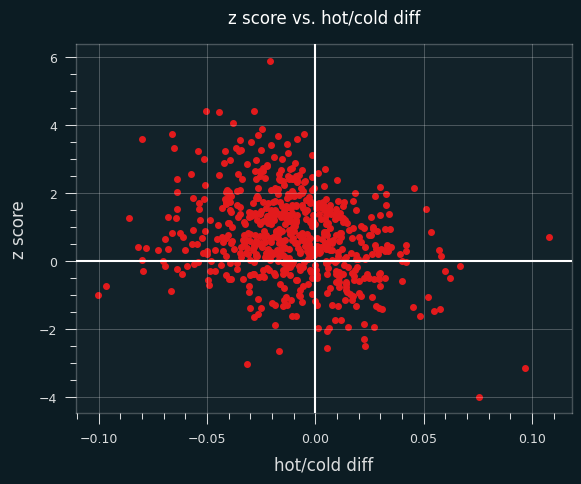

In [50]:
plt.scatter(highvol['pct_diff'], highvol['z_score'])

plt.title("z score vs. hot/cold diff")

plt.xlabel("hot/cold diff")
plt.ylabel("z score")

plt.axhline(0, color="white")
_out = plt.axvline(0, color="white")

In [51]:
highvol.pct_diff.corr(highvol.z_score)

np.float64(-0.26866945333712183)

In [52]:
highvol['pos_z'] = (highvol.z_score > 0)
highvol['pos_pct_diff'] = (highvol.pct_diff > 0)

each of the four boxes should have the same-ish counts, if both z scores and percent differences are independent. (I will simulate this later on)

instead we see a lot of players that have positive z scores and also have negative percent differences (they shoot worse when they've made 3,4 or 5 of their last 5.)

In [53]:
pd.crosstab(highvol.pos_pct_diff, highvol.pos_z )

pos_z,False,True
pos_pct_diff,,
False,88,343
True,78,126


among high volume shooters, over 2/3rds of them shoot WORSE when they've made >=3 of their last 5 shots.

In [54]:
highvol.pos_pct_diff.value_counts()

pos_pct_diff
False    431
True     204
Name: count, dtype: int64

In [55]:
430 / (430 + 205)

0.6771653543307087

this shows that higher volume scorers tend to shoot better when they're "cold" than when they're hot. there should be as many dots on both sides of the diagonal line

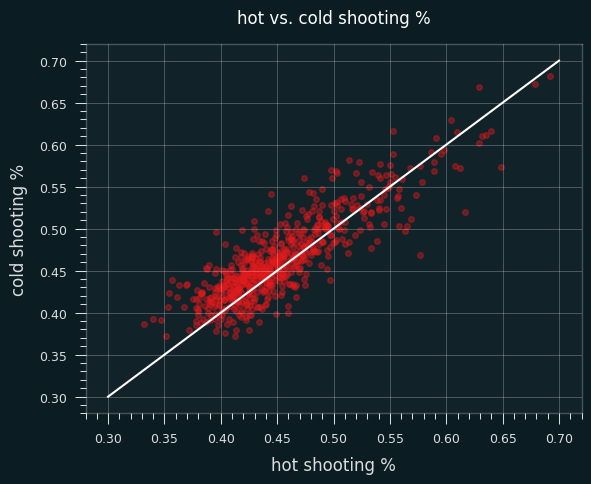

In [56]:
plt.scatter(highvol.hot_pct, highvol.cold_pct, alpha=.4)
plt.xlabel("hot shooting %")
plt.ylabel("cold shooting %")
plt.title("hot vs. cold shooting %")

_out = plt.plot([.3,.7], [.3,.7], color="white")

In [57]:
highvol.sort_values("lbj_entropy")[1:101]

,player_name,makes,misses,total_streaks,raw_data,expected_streaks,variance,sd,z_score,ww_percentile,...,4,5,cold_pct,hot_pct,lbj_entropy,lbj_jensen,pct_diff,fg_pct,pos_z,pos_pct_diff
player_id,,,,,,,,,,,,,,,,,,,,,
203468,CJ McCollum,5427,6539,6003,LWLWLWLLWWWLWLLWLWLLWLLWWLLWLLWWLWWLWLLLWLLWWL...,5932.330938,2939.804042,54.219960,1.303377,90.377700,...,0.438856,0.412162,0.460363,0.446424,0.000157,0.006257,-0.01394,0.453535,True,False
1626179,Terry Rozier,3114,4295,3660,LLLLLWWLLLWLLLLLWWLLWLWWLLWLLLLLWLLLLWLWLLLWWW...,3611.373870,1759.069804,41.941266,1.159386,87.685063,...,0.388262,0.391304,0.441,0.408199,0.000185,0.006799,-0.032802,0.420300,True,False
200745,Andrea Bargnani,2932,3744,3340,WLLWLLLWLWLLLWWLWWWLWLWWLLLWLWLWWLLWLWLLLWWWLL...,3289.618334,1619.733623,40.245914,1.251845,89.468691,...,0.430108,0.4,0.443043,0.438892,0.000186,0.006826,-0.004151,0.439185,True,False
1888,Richard Hamilton,4126,4938,4574,WLLWLLLWLLLLLLWWWWWLLWWLLLLWWWLLLLLWWWWWLLWLWL...,4496.628420,2229.524359,47.217839,1.638609,94.935265,...,0.43544,0.401869,0.451191,0.4424,0.000240,0.007749,-0.008791,0.455207,True,False
202696,Nikola Vucevic,6580,6715,6814,WLLLWWWLLWWLWLLWLWWWWWLWLLWLLLWLWLWLWLLWWWLLWW...,6647.814592,3322.814608,57.643860,2.882968,99.803026,...,0.477306,0.456897,0.495417,0.486234,0.000264,0.008121,-0.009183,0.494923,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201609,Goran Dragic,4605,5423,5166,WWLLLLWLLLWLWLLLWWWLWLWLLLWLLWLLLLWWLLLLLWWLWL...,4981.637216,2473.498199,49.734276,3.706956,99.989512,...,0.416901,0.378641,0.461694,0.435171,0.001275,0.017811,-0.026523,0.459214,True,False
201959,Taj Gibson,3431,3202,3338,LLWLLLLLWWWWLLLLWLLLWLWLWWWLLWWLWLLWWWLWWLWLLW...,3313.546962,1654.049281,40.670005,0.601255,72.616487,...,0.481395,0.514286,0.527679,0.497744,0.001278,0.017880,-0.029934,0.517262,True,False
1627759,Jaylen Brown,3780,4091,3982,LWWWLWWWLLWWLWLLWLLWWLLWLWWLLWWLLWWLLLLWLLLLWL...,3930.355863,1961.360628,44.287251,1.166117,87.821652,...,0.456604,0.401786,0.484544,0.475448,0.001291,0.017956,-0.009096,0.480244,True,False


84% of all NBA shots are by these players.

In [165]:
sum(highvol.makes  + highvol.misses)/ sum(all_players.makes + all_players.misses)

0.8397192137948442

4231262

## LeOneMoreSimulation

I want to simulate the z score vs. hot-cold percentage. they shouldn't be *totally* uncorrelated, unless my intuitions are wrong (quite possible).

all I will do is take the 'cleaned' shot data and redo the shots using the player's overall fg% age for the season.

In [58]:
cleaned

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,SORTABLE_DATE,makes_in_game,misses_in_game,shot_seq,shoot_pct,last_5
0,2004,2003-04,1610612748,Miami Heat,2548,Dwyane Wade,G,PG,10-28-2003,20300001,...,0,1,11,48,2003-10-28,0,0,1,0.000000,NaN
1,2004,2003-04,1610612756,Phoenix Suns,2063,Jake Voskuhl,C,C,10-28-2003,20300002,...,2,1,11,42,2003-10-28,0,0,1,0.000000,NaN
2,2004,2003-04,1610612747,Los Angeles Lakers,406,Shaquille O'Neal,C,C,10-28-2003,20300003,...,6,1,11,39,2003-10-28,0,0,1,0.000000,NaN
3,2004,2003-04,1610612759,San Antonio Spurs,1938,Manu Ginobili,G,SG,10-28-2003,20300002,...,25,1,11,24,2003-10-28,0,0,1,0.000000,NaN
4,2004,2003-04,1610612755,Philadelphia 76ers,2422,John Salmons,G,SG,10-28-2003,20300001,...,23,1,11,21,2003-10-28,0,0,1,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231257,2024,2023-24,1610612741,Chicago Bulls,201942,DeMar DeRozan,F,SF,04-14-2024,22301190,...,1,5,0,42,2024-04-14,10,12,23,0.454545,0.2
4231258,2024,2023-24,1610612752,New York Knicks,1628978,Donte DiVincenzo,G,SG,04-14-2024,22301190,...,1,5,0,20,2024-04-14,10,10,21,0.500000,0.6
4231259,2024,2023-24,1610612752,New York Knicks,1628404,Josh Hart,F,SF,04-14-2024,22301190,...,0,5,0,19,2024-04-14,5,4,10,0.555556,0.8
4231260,2024,2023-24,1610612741,Chicago Bulls,1627936,Alex Caruso,G,SG,04-14-2024,22301190,...,0,5,0,14,2024-04-14,4,3,8,0.571429,0.8


In [60]:
players_with_fives['fg_pct']

player_id
15         0.401408
43         0.377778
56         0.448911
57         0.433678
72         0.433260
             ...   
1641926    0.526316
1641931    0.380952
1641970    0.514286
1641998    0.551471
1642013    0.264706
Name: fg_pct, Length: 2162, dtype: float64

In [62]:
## OK, this is gonna kinda suck. first off, restrict shots to 'highvol' players

shots_to_sim = cleaned[cleaned.PLAYER_ID.isin(highvol.index)]

In [63]:
len(shots_to_sim)

3545923

In [66]:
shots_to_sim.PLAYER_NAME.value_counts()

PLAYER_NAME
LeBron James          29277
Carmelo Anthony       22598
Russell Westbrook     20642
Kevin Durant          19866
Dirk Nowitzki         18270
                      ...  
James Ennis III        1979
Primoz Brezec          1967
Corey Kispert          1891
O.G. Anunoby           1634
Reggie Bullock Jr.       82
Name: count, Length: 637, dtype: int64

## Never mind the Bullocks, here's the shot simulation

There are only 82 shots from "Reggie Bullock Jr." because before the most recent season, he was known as "Reggie Bullock".

In [126]:
cleaned[cleaned.PLAYER_NAME == "Reggie Bullock Jr."].head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,SORTABLE_DATE,makes_in_game,misses_in_game,shot_seq,shoot_pct,last_5
4013631,2024,2023-24,1610612745,Houston Rockets,203493,Reggie Bullock Jr.,None,None,10-25-2023,22300066,...,22,2,8,24,2023-10-25,0,0,1,0.0,NaN
4016061,2024,2023-24,1610612745,Houston Rockets,203493,Reggie Bullock Jr.,None,None,10-27-2023,22300083,...,26,2,9,13,2023-10-27,0,0,1,0.0,NaN
4019024,2024,2023-24,1610612745,Houston Rockets,203493,Reggie Bullock Jr.,None,None,10-29-2023,22300096,...,26,2,9,37,2023-10-29,0,0,1,0.0,NaN
4019061,2024,2023-24,1610612745,Houston Rockets,203493,Reggie Bullock Jr.,None,None,10-29-2023,22300096,...,23,2,7,47,2023-10-29,0,1,2,0.0,NaN
4030652,2024,2023-24,1610612745,Houston Rockets,203493,Reggie Bullock Jr.,None,None,11-06-2023,22300153,...,27,4,7,55,2023-11-06,0,0,1,0.0,NaN


In [127]:
cleaned[cleaned.PLAYER_ID == 203493].head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,SORTABLE_DATE,makes_in_game,misses_in_game,shot_seq,shoot_pct,last_5
1941340,2014,2013-14,1610612746,Los Angeles Clippers,203493,Reggie Bullock,F,SF,10-29-2013,21300003,...,13,4,0,56,2013-10-29,0,0,1,0.0,NaN
1949050,2014,2013-14,1610612746,Los Angeles Clippers,203493,Reggie Bullock,F,SF,11-04-2013,21300050,...,18,4,3,28,2013-11-04,0,0,1,0.0,NaN
1949070,2014,2013-14,1610612746,Los Angeles Clippers,203493,Reggie Bullock,F,SF,11-04-2013,21300050,...,24,4,1,36,2013-11-04,0,1,2,0.0,NaN
1954987,2014,2013-14,1610612746,Los Angeles Clippers,203493,Reggie Bullock,F,SF,11-09-2013,21300090,...,25,1,3,9,2013-11-09,0,0,1,0.0,NaN
1955061,2014,2013-14,1610612746,Los Angeles Clippers,203493,Reggie Bullock,F,SF,11-09-2013,21300090,...,23,1,0,44,2013-11-09,0,1,2,0.0,NaN


In [76]:
shots_to_sim.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,SORTABLE_DATE,makes_in_game,misses_in_game,shot_seq,shoot_pct,last_5
0,2004,2003-04,1610612748,Miami Heat,2548,Dwyane Wade,G,PG,10-28-2003,20300001,...,0,1,11,48,2003-10-28,0,0,1,0.0,NaN
2,2004,2003-04,1610612747,Los Angeles Lakers,406,Shaquille O'Neal,C,C,10-28-2003,20300003,...,6,1,11,39,2003-10-28,0,0,1,0.0,NaN
3,2004,2003-04,1610612759,San Antonio Spurs,1938,Manu Ginobili,G,SG,10-28-2003,20300002,...,25,1,11,24,2003-10-28,0,0,1,0.0,NaN
4,2004,2003-04,1610612755,Philadelphia 76ers,2422,John Salmons,G,SG,10-28-2003,20300001,...,23,1,11,21,2003-10-28,0,0,1,0.0,NaN
5,2004,2003-04,1610612756,Phoenix Suns,950,Stephon Marbury,G,PG,10-28-2003,20300002,...,22,1,11,14,2003-10-28,0,0,1,0.0,NaN


In [91]:
cleaned.SHOT_MADE.value_counts(0)

SHOT_MADE
False    2286108
True     1936334
Name: count, dtype: int64

In [75]:
shots_to_sim.columns

Index(['SEASON_1', 'SEASON_2', 'TEAM_ID', 'TEAM_NAME', 'PLAYER_ID',
       'PLAYER_NAME', 'POSITION_GROUP', 'POSITION', 'GAME_DATE', 'GAME_ID',
       'HOME_TEAM', 'AWAY_TEAM', 'EVENT_TYPE', 'SHOT_MADE', 'ACTION_TYPE',
       'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB', 'ZONE_RANGE',
       'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT',
       'SORTABLE_DATE', 'makes_in_game', 'misses_in_game', 'shot_seq',
       'shoot_pct', 'last_5'],
      dtype='object')

In [ ]:
# for index, shot_data in simmed_shots.iterrows():
#     break

there are 3.6 million shots to simulate. it's crazy how top-heavy the league is, in that these 600 players take over 80% of all NBA shots (TODO: get exact number here)

the following takes about 6.5 minutes on my computer:

In [98]:
import numpy as np

rng = np.random.default_rng(2719)

RE_SIM = False

if RE_SIM:
    simmed_shots = shots_to_sim.copy()
    simmed_shots['makes_in_game'] = None
    simmed_shots['misses_in_game'] = None
    simmed_shots['shoot_pct'] = None
    simmed_shots['last_5'] = None
    simmed_shots['SHOT_MADE'] = None
    for index, shot_data in simmed_shots.iterrows():
        player_id = shot_data.PLAYER_ID
        fg_pct = players_with_fives.loc[player_id, 'fg_pct']
        result = False
        # re-simulate each shot at player's lifetime fg %age
        # NOTE: not matching shot type!
        # this is just for looking at 'last 5' vs z-score
        if rng.random() < fg_pct:
            result = True

        simmed_shots.loc[index, 'SHOT_MADE'] = result
    simmed_shots.to_feather("simmed_shots.feather")
else:
    simmed_shots = pd.read_feather("simmed_shots.feather")


OK, now I need to recalculate all the BS. This will take like a half hour to run, based on last time.

In [100]:
if RE_SIM:
    sim_aug = season_streaks.add_sequence_data(simmed_shots)
    sim_aug.to_feather("sim_aug.feather")
else:
    sim_aug = pd.read_feather("sim_aug.feather")

In [101]:
sim_aug

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,SORTABLE_DATE,makes_in_game,misses_in_game,shot_seq,shoot_pct,last_5
0,2004,2003-04,1610612748,Miami Heat,2548,Dwyane Wade,G,PG,10-28-2003,20300001,...,0,1,11,48,2003-10-28,0,0,1,0.000000,NaN
2,2004,2003-04,1610612747,Los Angeles Lakers,406,Shaquille O'Neal,C,C,10-28-2003,20300003,...,6,1,11,39,2003-10-28,0,0,1,0.000000,NaN
3,2004,2003-04,1610612759,San Antonio Spurs,1938,Manu Ginobili,G,SG,10-28-2003,20300002,...,25,1,11,24,2003-10-28,0,0,1,0.000000,NaN
4,2004,2003-04,1610612755,Philadelphia 76ers,2422,John Salmons,G,SG,10-28-2003,20300001,...,23,1,11,21,2003-10-28,0,0,1,0.000000,NaN
5,2004,2003-04,1610612756,Phoenix Suns,950,Stephon Marbury,G,PG,10-28-2003,20300002,...,22,1,11,14,2003-10-28,0,0,1,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231256,2024,2023-24,1610612741,Chicago Bulls,1629632,Coby White,G,PG,04-14-2024,22301190,...,25,5,0,57,2024-04-14,10,7,18,0.588235,0.6
4231257,2024,2023-24,1610612741,Chicago Bulls,201942,DeMar DeRozan,F,SF,04-14-2024,22301190,...,1,5,0,42,2024-04-14,8,14,23,0.363636,0.6
4231258,2024,2023-24,1610612752,New York Knicks,1628978,Donte DiVincenzo,G,SG,04-14-2024,22301190,...,1,5,0,20,2024-04-14,8,12,21,0.400000,0.2
4231259,2024,2023-24,1610612752,New York Knicks,1628404,Josh Hart,F,SF,04-14-2024,22301190,...,0,5,0,19,2024-04-14,6,3,10,0.666667,0.8


In [114]:
#FIXME: remove this
from importlib import reload
reload(season_streaks)
reload(hot_cold_analysis)

<module 'hot_cold_analysis' from 'c:\\code\\hot_hand\\hot_cold_analysis.py'>

OK so the problem here is that my original code is weird... it does stuff season by season. so I have to redo some stuff (ugh)

In [111]:
## repurposing of get_all_player_streaks()

import streaks_base
import streak_converter

stats_df = pd.DataFrame(columns=["player_id", "player_name", "makes", 
                                "misses", "total_streaks", "raw_data"])

streak_helper = streaks_base.StreaksBase()

for key, results in sim_aug.groupby(["PLAYER_ID"]):
    all_shots = "".join(results['SHOT_MADE'].replace(True, "W").replace(False, "L"))
    streak_data = streak_converter.convert_to_streaks(False, all_shots, False)
    stats_df.loc[len(stats_df)] = [key[0], results["PLAYER_NAME"].iloc[0], streak_data['makes'],  streak_data['misses'],
                                    streak_data['total_streaks'], streak_data['raw_data']
                                    ]
stats_df.set_index("player_id")
df_with_stats = streak_helper.calc_stats(stats_df)


In [112]:
df_with_stats

,player_id,player_name,makes,misses,total_streaks,raw_data,expected_streaks,variance,sd,z_score,ww_percentile
0,56,Gary Payton,1178,1479,1337,LLLLWLWWWWWLWWLWLWLLLLWLLLLWLLLWWWWLLWLWLWLLWL...,1312.450508,647.059859,25.437371,0.965095,83.275150
1,84,Latrell Sprewell,948,1276,1083,WWLLLWLLWWLWWWLLLLWWWLLWLWLWWLLLWWLWWWWWWWWWLL...,1088.812950,531.826001,23.061353,-0.252065,40.049558
2,133,David Wesley,878,1392,1088,WLLWWLLWLWWLWLWLLLLWWWLWLLLWLWLLWWLWLLLLLLLWLW...,1077.807048,510.549411,22.595340,0.451109,67.404435
3,136,P.J. Brown,1127,1384,1239,WWLLWLLLLWLLLLWWWLLLLLLLWLWLWWWWWWWWLLLWLWLLWW...,1243.348068,614.416883,24.787434,-0.175414,43.037708
4,147,Jalen Rose,1221,1657,1412,LLWLLLWLWWLLWLLWLLWWWWLWLLLLWLWWWLLWWLLLWLWLLL...,1406.974288,686.603310,26.203116,0.191798,57.604989
...,...,...,...,...,...,...,...,...,...,...,...
630,1630578,Alperen Sengun,1223,1074,1166,LLWLWWLWLWWLWLLWWWLWWLWWWWLWLWLWLWWWWWWWWWWLWL...,1144.667392,569.177455,23.857440,0.894170,81.438453
631,1630581,Josh Giddey,1208,1426,1346,WLLLLWWWLWLWWLLWWWWWWWLLWWWWWWLWLLWLWWLWLWWLWW...,1308.978740,649.259554,25.480572,1.452921,92.687717
632,1630595,Cade Cunningham,1044,1370,1234,LLWLLLLWLWLWWWLLLLWWLWWWLWLWWLWWLLLWLWWLLLLLLL...,1185.987572,581.438276,24.113031,1.991140,97.676727
633,1630596,Evan Mobley,1250,1079,1138,WLWLLWLLWLWWWLLWLWWWWLWLWLLLWWWLLWWWWWWLLLWWWW...,1159.222413,575.739234,23.994567,-0.884467,18.822197


In [115]:
sim_complete = hot_cold_analysis.get_complete_player_data(sim_aug, df_with_stats)

In [116]:
sim_complete

,player_name,makes,misses,total_streaks,raw_data,expected_streaks,variance,sd,z_score,ww_percentile,...,2,3,4,5,cold_pct,hot_pct,lbj_entropy,lbj_jensen,pct_diff,fg_pct
player_id,,,,,,,,,,,,,,,,,,,,,
56,Gary Payton,1178,1479,1337,LLLLWLWWWWWLWWLWLWLLLLWLLLLWLLLWWWWLLWLWLWLLWL...,1312.450508,647.059859,25.437371,0.965095,83.275150,...,0.436059,0.416129,0.491935,0.458333,0.432398,0.438865,0.016339,0.062383,0.006467,0.443357
84,Latrell Sprewell,948,1276,1083,WWLLLWLLWWLWWWLLLLWWWLLWLWLWWLLLWWLWWWWWWWWWLL...,1088.812950,531.826001,23.061353,-0.252065,40.049558,...,0.425311,0.430809,0.418033,0.333333,0.424917,0.425,0.002352,0.023991,0.000083,0.426259
133,David Wesley,878,1392,1088,WLLWWLLWLWWLWLWLLLLWWWLWLLLWLWLLWWLWLLLLLLLWLW...,1077.807048,510.549411,22.595340,0.451109,67.404435,...,0.422886,0.353383,0.285714,0.642857,0.417488,0.351429,0.033540,0.092566,-0.066059,0.386784
136,P.J. Brown,1127,1384,1239,WWLLWLLLLWLLLLWWWLLLLLLLWLWLWWWWWWWWLLLWLWLLWW...,1243.348068,614.416883,24.787434,-0.175414,43.037708,...,0.457227,0.432886,0.444444,0.5,0.434555,0.440449,0.020460,0.069532,0.005894,0.448825
147,Jalen Rose,1221,1657,1412,LLWLLLWLWWLLWLLWLLWWWWLWLLLLWLWWWLLWWLLLWLWLLL...,1406.974288,686.603310,26.203116,0.191798,57.604989,...,0.465278,0.425926,0.450617,0.333333,0.436673,0.428999,0.009934,0.049285,-0.007674,0.424253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630578,Alperen Sengun,1223,1074,1166,LLWLWWLWLWWLWLLWWWLWWLWWWWLWLWLWLWWWWWWWWWWLWL...,1144.667392,569.177455,23.857440,0.894170,81.438453,...,0.538251,0.51954,0.573171,0.454545,0.541133,0.532609,0.001644,0.020234,-0.008525,0.532434
1630581,Josh Giddey,1208,1426,1346,WLLLLWWWLWLWWLLWWWWWWWLLWWWWWWLWLLWLWWLWLWWLWW...,1308.978740,649.259554,25.480572,1.452921,92.687717,...,0.456942,0.419565,0.482558,0.4,0.475936,0.435583,0.004934,0.035178,-0.040353,0.458618
1630595,Cade Cunningham,1044,1370,1234,LLWLLLLWLWLWWWLLLLWWLWWWLWLWWLWWLLLWLWWLLLLLLL...,1185.987572,581.438276,24.113031,1.991140,97.676727,...,0.429766,0.423767,0.396226,0.391304,0.449909,0.415605,0.002267,0.023987,-0.034304,0.432477


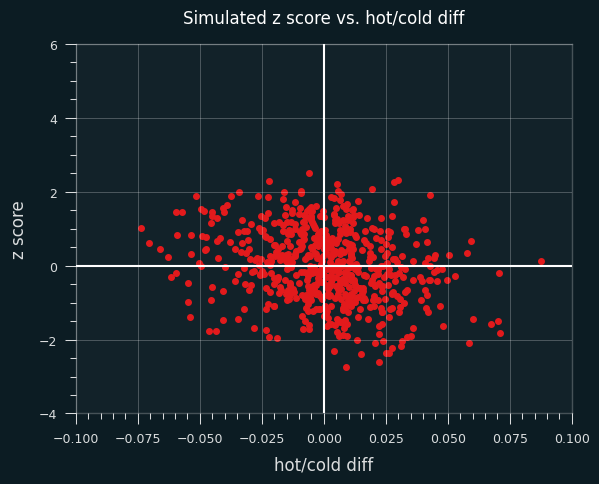

In [128]:
plt.scatter(sim_complete['pct_diff'], sim_complete['z_score'])

plt.title("Simulated z score vs. hot/cold diff")

plt.xlabel("hot/cold diff")
plt.xlim(-.1, .1)

plt.ylabel("z score")
plt.ylim(-4, 6)


plt.axhline(0, color="white")
_out = plt.axvline(0, color="white")

<Axes: >

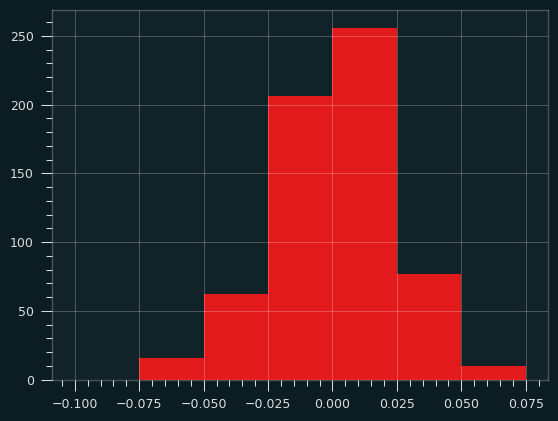

In [130]:
sim_complete.pct_diff.hist(bins=np.arange(-.1,.1,.025))

In [118]:
sim_complete['pos_z'] = (sim_complete.z_score > 0)
sim_complete['pos_pct_diff'] = (sim_complete.pct_diff > 0)

In [119]:
pd.crosstab(sim_complete.pos_z, sim_complete.pos_pct_diff)

pos_pct_diff,False,True
pos_z,,
False,112,210
True,178,135


In [121]:
pd.crosstab( highvol.pos_z, highvol.pos_pct_diff )

pos_pct_diff,False,True
pos_z,,
False,88,78
True,343,126


In [120]:
sim_complete.z_score.corr(sim_complete.pct_diff)

np.float64(-0.23057605951295135)

## Breaking: 3 points more valuable than 2

In [124]:
469 /(469+166)

0.7385826771653543

In [156]:
.627 * 2

1.254

In [157]:
.384 * 3

1.1520000000000001

In [158]:
.398 * 2

0.796

lost points due to taking middies instead of restricted area 2's, let's say there's one of these a game

In [166]:
(1.254 - .796) * 1 * 82

37.556

In [1]:
.601 * 2

1.202

In [2]:
.34 * 3

1.02